#모수 확률밀도 추정(Parametric Density Estimation) : 클래스별 


*   확률 모델 가정 후 값(파라미터) 추정 : 평균이나 분산 등
*   단점 : 추정한 밀도함수와 모집단 밀도 함수 차이 시 의미 없음



## 데이터가 가우시안 분포로 가정
$
p(x|C_k) = G(x;μ_k, Σ_k) \\
= \frac{1}{\sqrt{2π_n}\sqrt{|Σ_k|}}\exp[-\frac{1}{2}(x-μ_k)^TΣ_k^{-1}(x-μ_k)]
$

In [19]:
import numpy as np
np.random.seed(0)

row_count = 100

## 단변량 분포

In [20]:
x = np.linspace(-8, 8, row_count)

mu_1, sigma_1 = 0.0, 1.0
mu_2, sigma_2 = 1.5, 1.5
mu_3, sigma_3 = 3.0, 2.0

y_1 = (1 / np.sqrt(2 * np.pi * sigma_1**2)) * np.exp(-(x-mu_1)**2 / (2 * sigma_1**2))
y_2 = (1 / np.sqrt(2 * np.pi * sigma_2**2)) * np.exp(-(x-mu_2)**2 / (2 * sigma_2**2))
y_3 = (1 / np.sqrt(2 * np.pi * sigma_3**2)) * np.exp(-(x-mu_3)**2 / (2 * sigma_3**2))
print(y_1.var(),  y_2.var(), y_3.var()) # 분산
print(y_1.std(),  y_2.std(), y_3.std()) # 표준편차
type(x), x.shape, y_1.shape, x.mean(),#x, y_1 

0.013626099616008715 0.007807938064356931 0.0049395649799881735
0.11673088544172325 0.08836253767494985 0.07028203881496448


(numpy.ndarray, (100,), (100,), 6.572520305780927e-16)

In [21]:
import matplotlib.pyplot as plt

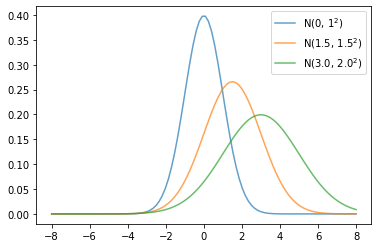

In [22]:
plt.plot(x, y_1, alpha=0.7, label=r'N(0, $1^2$)')
plt.plot(x, y_2, alpha=0.7, label=r'N(1.5, $1.5^2$)')
plt.plot(x, y_3, alpha=0.7, label='N(3.0, $2.0^2$)')
plt.legend(ncol=1)

In [23]:
x_rand = np.sort(np.random.randn(row_count))  # 그래프 분포 점 표시 위해 정렬
x_rand.shape, x_rand.mean(), x_rand.std()# x_rand

((100,), 0.059808015534484955, 1.0078822447165796)

In [24]:
mu_rand, sigma_rand = -0.08, 0.96   # 비교 위해 평균과 분산 조정
y_rand = (1 / np.sqrt(2 * np.pi * sigma_rand**2)) * np.exp(-(x_rand-mu_rand)**2 / (2 * sigma_rand**2))

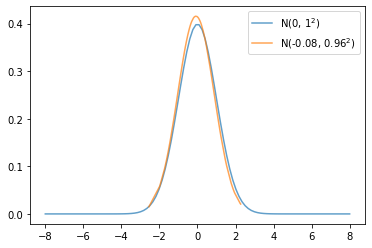

In [25]:
x_like = np.full_like(x, fill_value=-0.001)  
# plt.plot(x, x_like, 'o', color='blue', ms=1, ls='None', label=r'P N(0, $1^2$)') # 수직선 상에 표시

plt.plot(x, y_1, alpha=0.7, label=r'N(0, $1^2$)')
plt.plot(x_rand, y_rand, alpha=0.7, label=r'N(-0.08, $0.96^2$)')
plt.legend(ncol=1)

##다변량 분포

### x, y 축 가우시안 분포 생성

In [26]:
normal_rand_x = np.random.randn(row_count, 1)
normal_rand_y = np.random.randn(row_count, 1)
# normal_rand, 
normal_rand_x.shape,normal_rand_y.shape, type(normal_rand_x)

((100, 1), (100, 1), numpy.ndarray)

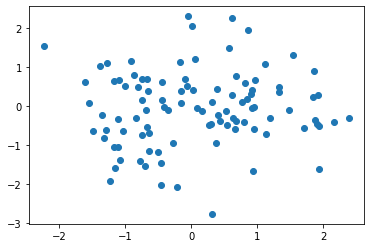

In [27]:
plt.plot(normal_rand_x, normal_rand_y,marker='o', linestyle='None')

### 정규 평균과 공분산 행렬 정의

In [28]:
mu_rand, sigma_rand = np.array([0,0]), np.eye(2, dtype=int) 
mu_rand, sigma_rand

(array([0, 0]), array([[1, 0],
        [0, 1]]))

In [29]:
grid_x, grid_y = np.meshgrid(normal_rand_x, normal_rand_y)
grid_x.shape, grid_y.shape

((100, 100), (100, 100))

In [30]:
axis_x = np.reshape(grid_x, (-1,1))
axis_y = np.reshape(grid_y, (-1,1))
mash_xy = np.hstack((axis_x, axis_y))
axis_x.shape, axis_y.shape, mash_xy.shape

((10000, 1), (10000, 1), (10000, 2))

###분포 밀도 측정 
$
p(x|C_k) = G(x;μ_k, Σ_k) \\
= \frac{1}{\sqrt{2π_n}\sqrt{|Σ_k|}}\exp[-\frac{1}{2}(x-μ_k)^TΣ_k^{-1}(x-μ_k)]
$

#### 공식 들어간 연산 하나 행으로 연습

In [32]:
(mash_xy[1,:]-mu_rand).shape

(2,)

In [31]:
np.invert(sigma_rand), sigma_rand

(array([[-2, -1],
        [-1, -2]]), array([[1, 0],
        [0, 1]]))

In [35]:
1/np.sqrt(2*np.pi*np.linalg.det(sigma_rand))*np.exp(-1/2*(mash_xy[1,:]-mu_rand).T @ np.invert(sigma_rand) @ (mash_xy[1,:]-mu_rand))

4.624551301885948

In [41]:
axis_z = [] #계속 돌리다보면 for에 저장되니 깡통을 만들어서 돌릴때마다 리셋 해준다.

for i in range(mash_xy.shape[0]):
  measure = 1/np.sqrt(2*np.pi*np.linalg.det(sigma_rand))*np.exp(-1/2*(mash_xy[1,:]-mu_rand).T @ np.invert(sigma_rand) @ (mash_xy[1,:]-mu_rand))
  axis_z = np.append(axis_z, measure)
    #append를 사용해서 옆으로 붙여준다 / np.pi는 3.14 / np.linalg.det는 determinant, 행렬식(행렬 -> 숫자) / exp는 exponantial ()안을 지수로 만들어줌 / linalg.inv는 inverse 역행렬
    #np.exp 앞의 값을 실수로 추정되니 *로 스칼라곱해주고, np.linalg앞은 1*2 행렬과 그뒤 2*1행렬이니 @로 행렬곱셈해준다.
    #!파이썬 행렬의 곱셈에서는 뒤에 백터(n*1 이던 1*n)는 @ 연산을 쓰면 자동으로 앞의열과 백터의 길이만 맞으면 자동으로 연산을 한다. 결과 값은 당연 (n, )으로 표현된다?

axis_z.shape, axis_z, type(axis_z)

((10000,), array([4.6245513, 4.6245513, 4.6245513, ..., 4.6245513, 4.6245513,
        4.6245513]), numpy.ndarray)

In [43]:
mash_z = np.reshape(axis_z, grid_x.shape)
mash_z.shape

(100, 100)

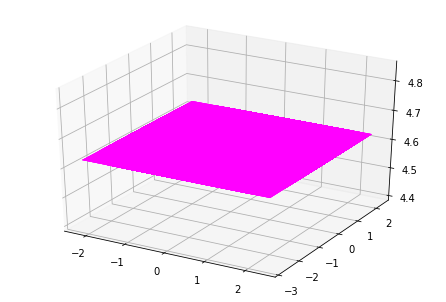

In [45]:
# refer : https://github.com/SanghunOh/study_machinglearning/blob/main/codes/sanghunoh/3_1_Data_Generation_and_Drawing_true.ipynb
from mpl_toolkits.mplot3d import Axes3D #plot 3D 그리는 툴킷이라고 함

fig = plt.figure() #plt.figure를 호출해서 fig라는 변수에 저장
ax = Axes3D(fig) #Axes3D모듈에 위에서 저장한 plt.figure를 불러와서 ax에 저장 
ax.plot_surface(grid_x, grid_y, mash_z, rstride=1, cstride=1, cmap='spring') #3D 추출함수는 ax.plot_surface로 기억하자
  #rstride, cstride는 각각 row와 column의 샘플 추출 간격 (값이 커지면 격자가 커진다)

plt.show()

## 모수추정 시 단점 : 분포 형식 선택 오류 시 좋은 추정 함수 얻기 어려움

In [ ]:
x_list = np.random.randint(-8,8,5)

In [ ]:
pdf_list = np.random.choice(x_list, p=[0.05, 0.3, 0.2, 0.05, 0.4], size=(100)) # PDF(Probability Density Function)-적분
pdf_list

array([ 2, -6, -7, -6, -6,  2, -6, -7, -6,  2, -6,  2, -6,  2, -6, -5, -5,
       -5, -5, -6, -6, -6, -6, -5,  2,  2, -6, -6,  2, -5, -7,  1, -5, -5,
        2, -5, -6, -7, -6, -6,  2,  2, -5, -6, -5,  2, -5, -6, -6, -6, -6,
       -5, -6, -6, -7, -6, -5, -6, -5, -6, -5, -6, -5, -6, -6,  2, -5, -5,
       -6, -5, -5,  2, -6,  2, -7,  2,  2,  2,  2,  1, -6,  1,  1,  2,  1,
        2,  2, -6, -5, -6, -6, -5, -5, -5,  2, -5,  2, -6, -5,  2])

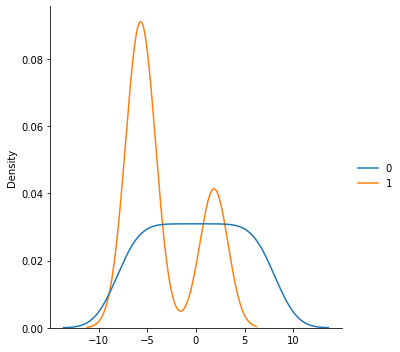

In [ ]:
import seaborn as sns
sns.displot([x,pdf_list], kind='kde')    # kdep은 커널 밀도 추정(kernal density estimation)
# sns.displot(, kind='kde')
plt.show()